# 이미지 데이터의 시각화
<!-- 5-2 -->


1. numpy의 설치
- 가상환경의 선택
- conda install numpy
    Anaconda 설치 경로의 확인:

2. 벡터와 행렬의 생성
    numpy.array 
(1) 리스트를 이용한 벡터의 생성
(2) numpy.zeros(), numpy.ones()
(3) numpy.repeat()
(4) 리스트를 이용한 행렬의 생성
(5) 대각행렬 생성하기 (numpy.diag())

3. 벡터와 행렬의 형태 변환
(1) shape 이해하기
(2) reshape 이해하기 (order = ‘C’ or ‘F’)
----

In [1]:
import PIL
import urllib
import numpy as np
import matplotlib.pyplot as plt

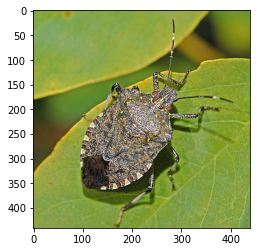

In [2]:
'''5-2-1 이미지 데이터의 구조'''
# 예제 1 RGB 이미지 데이터
img_raw = PIL.Image.open(urllib.request.urlopen("http://ranking.uos.ac.kr/class/VIS/data/stinkbug.jpeg"))
plt.imshow(img_raw)

In [3]:
img = np.array(img_raw)
print("Type of img is ", type(img))
print("Shape of img is ", img.shape) # H-W-C
print("dtype is", img.dtype)
img[100:103,120:130,0]

Type of img is  <class 'numpy.ndarray'>
Shape of img is  (441, 440, 3)
dtype is uint8


array([[139, 140, 141, 142, 142, 142, 142, 141, 136, 136],
       [136, 138, 140, 141, 142, 142, 141, 140, 136, 135],
       [136, 137, 138, 139, 140, 141, 140, 140, 136, 136]], dtype=uint8)

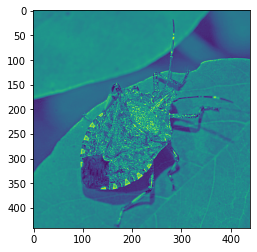

In [4]:
# 예제 2 gray scale 이미지 데이터
gray_img_raw = PIL.Image.open(urllib.request.urlopen("http://ranking.uos.ac.kr/class/VIS/data/stinkbug_gray.png"))
plt.imshow(gray_img_raw) 

[[119 118 118 ...  99 100 104]
 [118 117 117 ...  98  99 100]
 [116 116 115 ...  99  99  97]
 ...
 [123 127 127 ... 122 121 110]
 [120 126 128 ... 118 120 108]
 [121 123 126 ... 113 118 115]]
Type of img is  <class 'numpy.ndarray'>
Shape of img is  (441, 440)
dtype is uint8


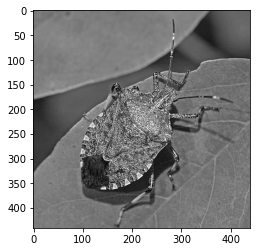

In [5]:
gray_img = np.array(gray_img_raw)
print(gray_img)
print("Type of img is ", type(gray_img))
print("Shape of img is ", gray_img.shape)
print("dtype is", gray_img.dtype)
plt.imshow(gray_img, cmap="gray")

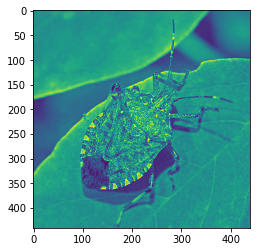

In [6]:
'''5-2-2 matplotlib을 활용한 이미지 데이터 처리'''
fig, ax = plt.subplots()
ax.imshow(img[:,:,0])

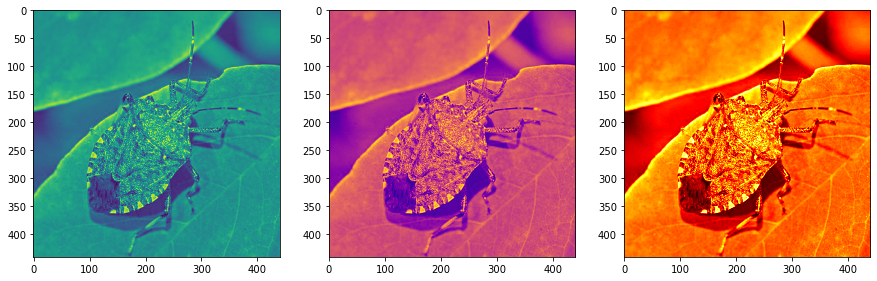

In [7]:
fig, ax = plt.subplots(1,3, figsize = (15,7.5))
ax[0].imshow(img[:,:,0])
ax[1].imshow(img[:,:,0], cmap ='plasma')
ax[2].imshow(img[:,:,0], cmap ='hot')

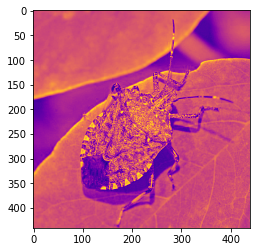

In [8]:

plt.imshow(img[:,:,0], cmap ='plasma')

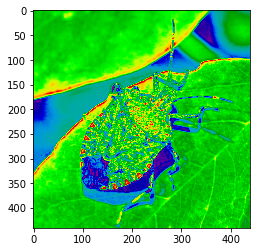

In [9]:
imgplot = plt.imshow(img[:,:,0], cmap ='plasma')
imgplot.set_cmap("nipy_spectral")

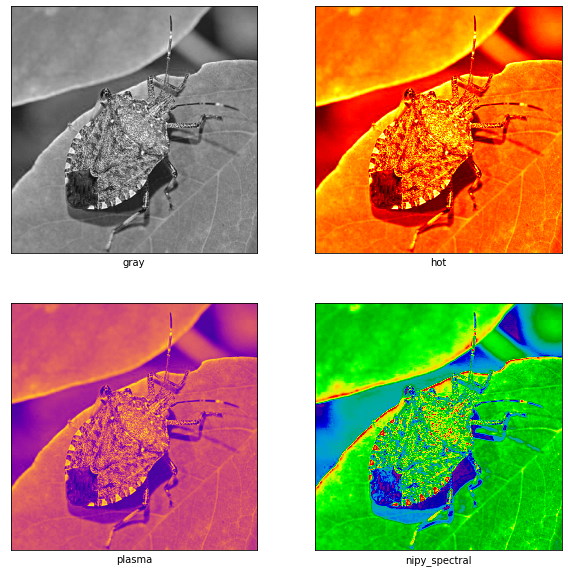

In [10]:
#%% 여러 이미지를 서브플롯으로 그리기
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, cmap in enumerate(["gray", "hot", "plasma", "nipy_spectral"]):
   r = i // 2; c = i % 2
   axes[r][c].imshow(img[:,:,0], cmap=cmap)
   axes[r][c].set_xlabel(cmap)
   axes[r][c].set_xticks([])
   axes[r][c].set_yticks([])

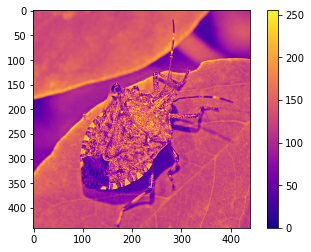

In [11]:
fig, ax = plt.subplots()
m = ax.imshow(img[:,:,0], cmap ='plasma')
# mapping colorbar to the image m
plt.colorbar(m)

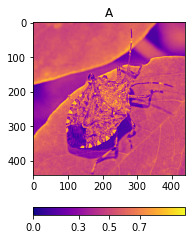

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
imgplot = plt.imshow(img[:,:,0]/255, cmap ='plasma')
ax.set_title("A")
plt.colorbar(ticks = [0, 0.3, 0.5, 0.7], orientation = 'horizontal')

Cropped Image shape: (250, 250, 3)


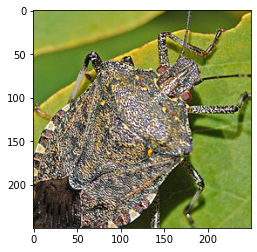

In [13]:
'''5-2-3 이미지 데이터 변형하고 시각화하기'''
# Crop
img_crop = img[100:350, 100:350, :]
print(f"Cropped Image shape: {img_crop.shape}")
plt.imshow(img_crop)

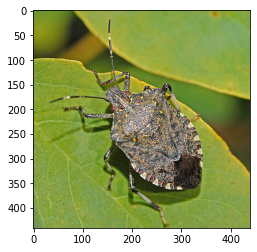

In [14]:
#%% Horizontal Flip
img_horiz = np.fliplr(img)
plt.imshow(img_horiz)

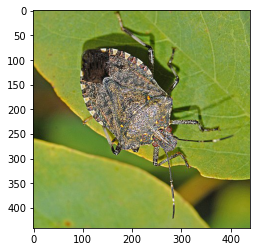

In [15]:
#%% Vertical Flip
img_vert = np.flipud(img)
plt.imshow(img_vert)

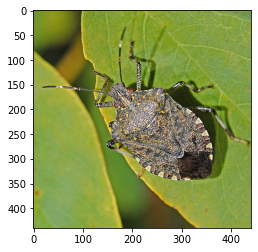

In [16]:
#%% 90 Rotation
img_rot = np.rot90(img)
plt.imshow(img_rot)

Concatenated Image shape: (882, 440, 3)


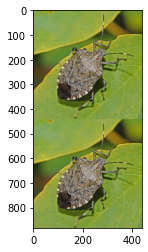

In [17]:
#%% Concat Image
img_concat1 = np.concatenate([img, img], axis=0)
print(f"Concatenated Image shape: {img_concat1.shape}")
plt.imshow(img_concat1)

Concatenated Image shape: (441, 880, 3)


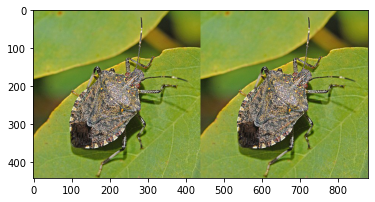

In [18]:
#%%
img_concat2 = np.concatenate([img, img], axis=1)
print(f"Concatenated Image shape: {img_concat2.shape}")
plt.imshow(img_concat2)

In [19]:
#%% Interpolate Image
img_resize = cv2.resize(img, (50, 50))
print(f"Resized Image shape: {img_resize.shape}")
plt.imshow(img_resize)

NameError: name 'cv2' is not defined

[[[129 168  61]
  [129 166  60]
  [129 166  60]
  ...
  [102 146  49]
  [105 146  50]
  [109 150  54]]

 [[128 167  60]
  [127 166  59]
  [128 165  59]
  ...
  [102 146  48]
  [104 145  49]
  [105 146  50]]

 [[126 165  59]
  [126 165  59]
  [126 163  58]
  ...
  [104 146  48]
  [104 146  48]
  [102 143  47]]

 ...

 [[133 161  76]
  [137 165  80]
  [137 165  81]
  ...
  [127 157  83]
  [126 156  82]
  [116 144  70]]

 [[129 158  74]
  [135 164  80]
  [137 164  83]
  ...
  [123 153  79]
  [125 156  80]
  [115 143  68]]

 [[130 159  75]
  [131 160  78]
  [134 163  83]
  ...
  [118 149  73]
  [123 154  78]
  [122 150  73]]]
[[[0.50588235 0.65882353 0.23921569]
  [0.50588235 0.65098039 0.23529412]
  [0.50588235 0.65098039 0.23529412]
  ...
  [0.4        0.57254902 0.19215686]
  [0.41176471 0.57254902 0.19607843]
  [0.42745098 0.58823529 0.21176471]]

 [[0.50196078 0.65490196 0.23529412]
  [0.49803922 0.65098039 0.23137255]
  [0.50196078 0.64705882 0.23137255]
  ...
  [0.4        0.5725490

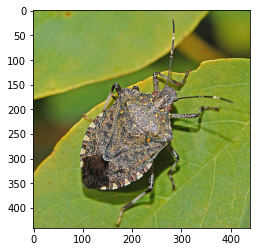

In [20]:
#%% Normalization
channel_min = np.array([np.min(img[:,:,i]) for i in range(3)])
channel_max = np.array([np.max(img[:,:,i]) for i in range(3)])
normalized_img = (img - channel_min) / channel_max
plt.imshow(normalized_img)

print(img)
print(normalized_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[129 168  61]
  [129 166  60]
  [129 166  60]
  ...
  [102 146  49]
  [105 146  50]
  [109 150  54]]

 [[128 167  60]
  [127 166  59]
  [128 165  59]
  ...
  [102 146  48]
  [104 145  49]
  [105 146  50]]

 [[126 165  59]
  [126 165  59]
  [126 163  58]
  ...
  [104 146  48]
  [104 146  48]
  [102 143  47]]

 ...

 [[133 161  76]
  [137 165  80]
  [137 165  81]
  ...
  [127 157  83]
  [126 156  82]
  [116 144  70]]

 [[129 158  74]
  [135 164  80]
  [137 164  83]
  ...
  [123 153  79]
  [125 156  80]
  [115 143  68]]

 [[130 159  75]
  [131 160  78]
  [134 163  83]
  ...
  [118 149  73]
  [123 154  78]
  [122 150  73]]]
[[[ 0.07348513  0.6123555  -0.04787803]
  [ 0.07348513  0.56583388 -0.07580722]
  [ 0.07348513  0.56583388 -0.07580722]
  ...
  [-0.60528524  0.10061764 -0.38302827]
  [-0.52986631  0.10061764 -0.35509909]
  [-0.42930774  0.19366088 -0.24338234]]

 [[ 0.04834549  0.58909469 -0.07580722]
  [ 0.02320584  0.56583388 -0.1037364 ]
  [ 0.04834549  0.54257307 -0.1037364 ]
  

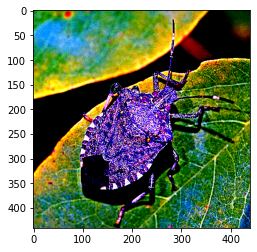

In [21]:
#%% Standardization
channel_mean = np.array([np.mean(img[:,:,i]) for i in range(3)])
channel_std = np.array([np.std(img[:,:,i]) for i in range(3)])
standardized_img = (img - channel_mean) / channel_std
plt.imshow(standardized_img)

print(img)
print(standardized_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


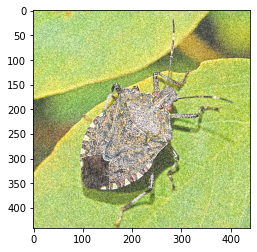

In [22]:
#%% Random Noise Contaminate
h, w = img.shape[:2]
noise = np.random.randint(0,100,(h, w, 1))
img_conta = img + noise
plt.imshow(img_conta)

NameError: name 'cv2' is not defined

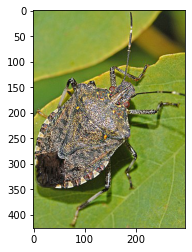

In [23]:
#%% Synthsize Image
source = img[15: ,93:390, :]
plt.imshow(source)
#%%
source_resize = cv2.resize(source, (120, 120))
plt.imshow(source_resize)

#%%
source_flip = np.fliplr(source_resize)
plt.imshow(source_flip)

#%%
source1 = np.concatenate([source_flip, source_resize], axis=0)
plt.imshow(source1)

#%%
source2 = np.concatenate([source_resize, source_flip], axis=1)
plt.imshow(source2)

#%%
synth_img = img.copy()
synth_img[0:source2.shape[0], 0:source2.shape[1], :] = source2
synth_img[synth_img.shape[0] - source1.shape[0]:, synth_img.shape[1] - source1.shape[1]:, :] = source1
plt.imshow(synth_img)
